In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class ProcessPitcherData:
    def load_pitcher_data(self, pitcher_data_file):
        # load pitcher data
        pitcher_data = pd.read_csv(pitcher_data_file)
        return pitcher_data

In [3]:
# file path for pitcher data
pitcher_data_file = 'fangraphs_season_level.csv'

# create instance of ProcessPitcherData class
process_pitcher_data = ProcessPitcherData()

# load pitcher data
pitcher_data = process_pitcher_data.load_pitcher_data(pitcher_data_file)

pitcher_data.head()

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Pit_plus_FC,Stf_plus_FS,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus
0,18,491703,NeftalÃ­ Feliz,Neftali Feliz,R,2021,33,- - -,RP,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.316418,95.123881,95.873134
1,1157,488984,Tommy Hunter,Tommy Hunter,R,2021,34,NYM,RP,3,...,103.100000,NaN,NaN,NaN,NaN,NaN,NaN,86.285556,94.884444,95.112222
2,1159,461865,Andrew Romine,Andrew Romine,R,2021,35,CHC,RP,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.925000,108.425000,99.200000
3,1246,456713,Matt Bush,Matt Bush,R,2021,35,TEX,RP,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.852174,98.340580,102.611594
4,1247,493603,Adam Ottavino,Adam Ottavino,R,2021,35,BOS,RP,69,...,66.583333,NaN,NaN,NaN,NaN,NaN,NaN,116.269527,94.625394,102.238617


In [4]:
# import 
pitcher_delta_df = pd.read_csv('pitcher_delta_grade.csv')

# Drop name column
pitcher_delta_df = pitcher_delta_df.drop(columns=['player_name'])

pitcher_delta_df.head()

,delta_diff,delta_avg,MLBAMID
0,0.012000,-0.085667,663897
1,0.132329,-0.080487,596112
2,0.010583,-0.073286,641525
3,0.054542,-0.072396,600986
4,0.111389,-0.064529,570731


In [5]:
# merge dataframes
pitcher_data = pd.merge(pitcher_data, pitcher_delta_df, on='MLBAMID')

pitcher_data.head()

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,delta_diff,delta_avg
0,1157,488984,Tommy Hunter,Tommy Hunter,R,2021,34,NYM,RP,3,...,NaN,NaN,NaN,NaN,NaN,86.285556,94.884444,95.112222,0.037060,0.008007
1,1157,488984,Tommy Hunter,Tommy Hunter,R,2022,35,NYM,RP,18,...,NaN,NaN,NaN,NaN,NaN,95.934758,108.332194,101.498006,0.037060,0.008007
2,1157,488984,Tommy Hunter,Tommy Hunter,R,2023,36,NYM,RP,14,...,NaN,NaN,NaN,NaN,NaN,82.804360,105.339510,100.527793,0.037060,0.008007
3,1157,488984,Tommy Hunter,Tommy Hunter,R,2021,34,NYM,SP,1,...,NaN,NaN,NaN,NaN,NaN,96.164706,114.752941,107.764706,0.037060,0.008007
4,1246,456713,Matt Bush,Matt Bush,R,2021,35,TEX,RP,4,...,NaN,NaN,NaN,NaN,NaN,124.852174,98.340580,102.611594,0.000057,0.014121


In [6]:
# thyago = pitcher_data[pitcher_data['Name'].str.contains('Ohtani')]

# thyago[['delta_diff','delta_avg',  'Name', 'Season']]

# Filter to MLBAMID to 488984
tommy = pitcher_data[pitcher_data['MLBAMID'] == 570731]

tommy


,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,delta_diff,delta_avg
1393,11265,570731,Jonathan Schoop,Jonathan Schoop,R,2023,31,DET,RP,1,...,NaN,NaN,NaN,NaN,NaN,-46.294118,102.388235,96.735294,0.111389,-0.064529


In [7]:
print(f"Pitcher data shape: {pitcher_data.shape}")

# 
print(f" Number of starting pitchers{pitcher_data[pitcher_data['Role'] == 'SP'].shape}")

#
print(f" Number of relief pitchers{pitcher_data[pitcher_data['Role'] == 'RP'].shape}")

Pitcher data shape: (2505, 310)
 Number of starting pitchers(947, 310)
 Number of relief pitchers(1558, 310)


In [8]:
# Filter data to 2023 season
pitcher_data = pitcher_data[pitcher_data['Season'] == 2023]

# Filter to only include number of innings pitched
pitcher_data = pitcher_data[pitcher_data['IP'] > 50]

print(pitcher_data.shape)


(331, 310)


In [9]:
print(f"Pitcher data shape: {pitcher_data.shape}")

# 
print(f" Number of starting pitchers{pitcher_data[pitcher_data['Role'] == 'SP'].shape}")

#
print(f" Number of relief pitchers{pitcher_data[pitcher_data['Role'] == 'RP'].shape}")

Pitcher data shape: (331, 310)
 Number of starting pitchers(176, 310)
 Number of relief pitchers(155, 310)


In [10]:
#
pitcher_data.sort_values('ERA', ascending=True)[['Name', 'ERA']].head(10)

,Name,ERA
167,Chris Martin,1.051949
900,Brusdar Graterol,1.239797
1800,Josh Hader,1.278107
1245,FÃ©lix Bautista,1.475410
1822,Tim Mayza,1.518751
455,Devin Williams,1.534090
160,Hector Neris,1.712196
502,Bryan Abreu,1.750000
2247,Tom Cosgrove,1.753248
1776,Hoby Milner,1.818654


In [11]:
# Filter column name containing Gerrit Cole
gerrit_cole = pitcher_data[pitcher_data['Name'].str.contains('Gerrit Cole')]
gerrit_cole[['Name', 'ERA', 'delta_diff', 'delta_avg']]

,Name,ERA,delta_diff,delta_avg
2325,Gerrit Cole,2.626794,0.000144,-0.013463


In [12]:
# Filter column name containing ohtani

ohtani_data = pitcher_data[pitcher_data['Name'].str.contains('Ohtani')]
ohtani_data

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,delta_diff,delta_avg
2390,19755,660271,Shohei Ohtani,Shohei Ohtani,R,2023,28,LAA,SP,23,...,93.112687,106.797761,NaN,NaN,NaN,120.518243,95.504871,102.865855,0.003818,-0.009127


/Users/adi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


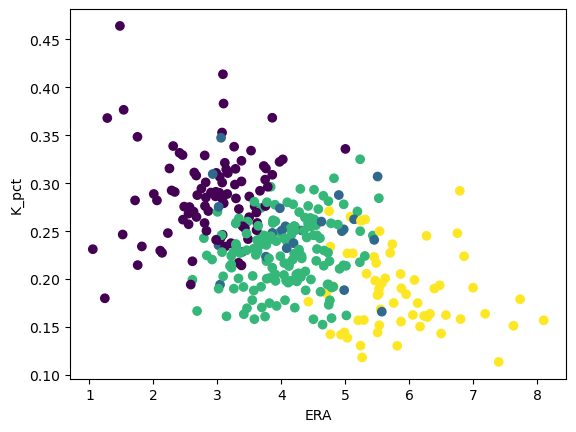

In [13]:
features = pitcher_data[['ERA', 'K_pct', 'WHIP', 'delta_diff', 'delta_avg']]

# Standardize the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Create a kmeans model on our data, using k clusters. Random_state helps ensure that the algorithm returns the same results each time.
model = KMeans(n_clusters=4, random_state=42)

# Use the fit method to fit the model to the features from the dataframe
pitcher_data['cluster'] = model.fit_predict(scaled_features)

# Create a scatter plot of the data, coloring by cluster
plt.scatter(pitcher_data['ERA'], pitcher_data['K_pct'], c=pitcher_data['cluster'], cmap='viridis')
plt.xlabel('ERA')
plt.ylabel('K_pct')

# Display the plot
plt.show()

In [14]:
pitcher_data[['Name', 'cluster']].head()

,Name,cluster
10,Adam Ottavino,0
15,Zack Greinke,2
36,Ryan Brasier,1
42,JosÃ© Cisnero,3
45,Craig Kimbrel,0


In [15]:
# Print value counts for each cluster
print(pitcher_data['cluster'].value_counts())

cluster
2    154
0     93
3     61
1     23
Name: count, dtype: int64


In [16]:
ohtani_data = pitcher_data[pitcher_data['Name'].str.contains('Ohtani')]
ohtani_data[['Name', 'ERA', 'K_pct', 'WHIP', 'cluster']]

,Name,ERA,K_pct,WHIP,cluster
2390,Shohei Ohtani,3.136364,0.3145,1.060606,0


In [17]:
gerrit_cole_data = pitcher_data[pitcher_data['Name'].str.contains('Gerrit')]

gerrit_cole_data[['Name', 'ERA', 'K_pct', 'WHIP', 'cluster']]

,Name,ERA,K_pct,WHIP,cluster
2325,Gerrit Cole,2.626794,0.2704,0.980861,0


In [18]:
blake_snell_data = pitcher_data[pitcher_data['Name'].str.contains('Blake Snell')]
blake_snell_data[['Name', 'ERA', 'K_pct', 'WHIP', 'cluster']]

,Name,ERA,K_pct,WHIP,cluster
2454,Blake Snell,2.25,0.3154,1.188889,0


In [19]:
cluster_4_df = pitcher_data[pitcher_data['cluster'] == 2]

cluster_4_df.head()

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,delta_diff,delta_avg,cluster
15,1943,425844,Zack Greinke,Zack Greinke,R,2023,39,KCR,SP,27,...,NaN,NaN,NaN,NaN,84.171591,104.203074,100.191026,0.006770,0.006281,2
63,6984,472610,Luis GarcÃ­a,Luis Garcia,R,2023,36,SDP,RP,61,...,101.855000,NaN,NaN,NaN,110.010307,97.521011,101.610307,0.019548,-0.018919,2
113,10123,502043,Kyle Gibson,Kyle Gibson,R,2023,35,BAL,SP,33,...,NaN,NaN,NaN,NaN,92.694268,99.617396,96.566766,0.000526,0.002900,2
164,11836,592836,Taijuan Walker,Taijuan Walker,R,2023,30,PHI,SP,31,...,99.841569,NaN,NaN,NaN,93.310785,98.856153,96.665099,0.020204,-0.005593,2
176,12095,554340,Yimi GarcÃ­a,Yimi Garcia,R,2023,32,TOR,RP,73,...,NaN,NaN,NaN,NaN,111.846182,100.743727,104.508000,0.020363,0.012737,2


In [20]:
cluster_4_df.sort_values(by='ERA', ascending=True)[['Name', 'ERA', 'Role', 'delta_avg', 'delta_diff']].head(20)

,Name,ERA,Role,delta_avg,delta_diff
758,Jason Foley,2.608696,RP,-0.007935,0.010483
2219,Alex Wood,2.682121,RP,0.001048,0.008405
2319,Sonny Gray,2.788043,SP,-0.013689,0.000123
1803,Wandy Peralta,2.833333,RP,0.004225,0.026667
1295,Josh Winckowski,2.916001,RP,0.006257,0.026562
645,Phil Maton,3.000000,RP,0.003986,0.006090
1281,Javier Assad,3.018632,SP,-0.008084,0.017580
1865,Justin Steele,3.063468,SP,-0.006521,0.006431
1279,Javier Assad,3.071855,RP,-0.008084,0.017580
1599,Kevin Kelly,3.089552,RP,-0.005407,0.010356


In [21]:
rp_cluster_4 = cluster_4_df[cluster_4_df['Role'] == 'RP']
# Print shape of relief pitcher cluster
print(rp_cluster_4.shape)
rp_cluster_4.sort_values(by='ERA', ascending=True)[['Name', 'ERA', 'Role', 'delta_avg', 'delta_diff']].head(10)

(53, 311)


,Name,ERA,Role,delta_avg,delta_diff
758,Jason Foley,2.608696,RP,-0.007935,0.010483
2219,Alex Wood,2.682121,RP,0.001048,0.008405
1803,Wandy Peralta,2.833333,RP,0.004225,0.026667
1295,Josh Winckowski,2.916001,RP,0.006257,0.026562
645,Phil Maton,3.000000,RP,0.003986,0.006090
1279,Javier Assad,3.071855,RP,-0.008084,0.017580
1599,Kevin Kelly,3.089552,RP,-0.005407,0.010356
930,Emmanuel Clase,3.220182,RP,-0.014735,0.019172
1795,Brent Suter,3.256283,RP,-0.011883,0.028848
684,Enyel De Los Santos,3.289338,RP,0.002339,0.008221


In [22]:
sp_cluster_4 = cluster_4_df[cluster_4_df['Role'] == 'SP']
# Print shape of starting pitcher cluster
print(sp_cluster_4.shape)
sp_cluster_4.sort_values(by='ERA', ascending=True)[['Name', 'ERA', 'Role','delta_avg', 'delta_diff']].head(20)

(101, 311)


,Name,ERA,Role,delta_avg,delta_diff
2319,Sonny Gray,2.788043,SP,-0.013689,0.000123
1281,Javier Assad,3.018632,SP,-0.008084,0.017580
1865,Justin Steele,3.063468,SP,-0.006521,0.006431
2092,Wade Miley,3.141283,SP,-0.003713,0.016178
2478,Jordan Montgomery,3.196112,SP,-0.000794,0.021953
2407,Justin Verlander,3.215606,SP,-0.011802,0.016274
325,Michael Wacha,3.215889,SP,-0.011497,0.000719
634,Logan Webb,3.250000,SP,-0.009260,0.008876
2484,Shane McClanahan,3.286957,SP,-0.008512,0.003388
2310,Merrill Kelly,3.292677,SP,0.000608,0.013399


In [32]:
pitcher_data

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,delta_diff,delta_avg,cluster
10,1247,493603,Adam Ottavino,Adam Ottavino,R,2023,37,NYM,RP,66,...,NaN,NaN,NaN,NaN,100.091211,94.763281,95.718750,0.069955,-0.044033,0
15,1943,425844,Zack Greinke,Zack Greinke,R,2023,39,KCR,SP,27,...,NaN,NaN,NaN,NaN,84.171591,104.203074,100.191026,0.006770,0.006281,2
36,5615,518489,Ryan Brasier,Ryan Brasier,R,2023,35,- - -,RP,59,...,NaN,NaN,NaN,NaN,106.076598,105.282914,106.066727,0.146894,0.054887,1
42,6399,542585,JosÃ© Cisnero,Jose Cisnero,R,2023,34,DET,RP,63,...,NaN,NaN,NaN,NaN,105.613990,96.461036,97.414611,0.008057,0.020210,3
45,6655,518886,Craig Kimbrel,Craig Kimbrel,R,2023,35,PHI,RP,71,...,NaN,NaN,NaN,NaN,125.195179,101.750893,114.085893,0.093141,-0.052338,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,27468,672282,Reid Detmers,Reid Detmers,L,2023,23,LAA,SP,28,...,NaN,NaN,NaN,NaN,100.711633,98.447997,98.911325,0.003489,0.000578,2
2497,25463,682227,Brandon Williamson,Brandon Williamson,L,2023,25,CIN,SP,23,...,NaN,NaN,NaN,NaN,90.049049,99.045030,95.207279,0.008281,-0.003588,2
2498,27472,694363,Jared Shuster,Jared Shuster,L,2023,24,ATL,SP,11,...,NaN,NaN,NaN,NaN,64.497569,96.029282,87.217130,0.003128,0.011966,3
2499,27589,671106,Logan Allen,Logan Allen,L,2023,24,CLE,SP,24,...,NaN,NaN,NaN,NaN,86.274262,101.359775,99.856071,0.005820,-0.004516,2


In [34]:
relief_data = pitcher_data[pitcher_data['Role'] == 'RP']
starter_data = pitcher_data[pitcher_data['Role'] == 'SP']

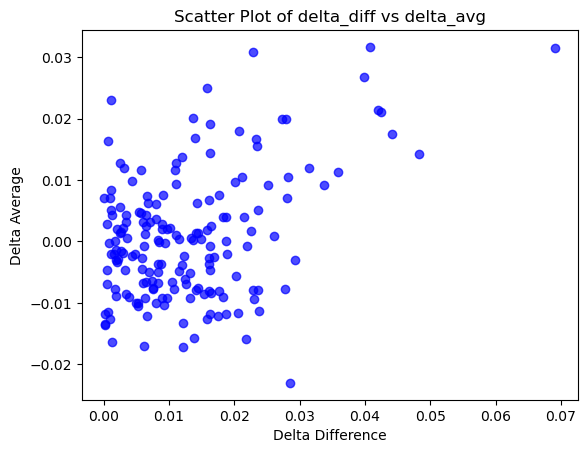

In [37]:
import matplotlib.pyplot as plt

# Assuming starter_data is your DataFrame
# Replace 'delta_diff' and 'delta_avg' with the actual column names in your DataFrame

x = starter_data['delta_diff']
y = starter_data['delta_avg']

plt.scatter(x, y, color='blue', alpha=0.7)  # You can customize the color and transparency

plt.title('Scatter Plot of delta_diff vs delta_avg')
plt.xlabel('Delta Difference')
plt.ylabel('Delta Average')

plt.show()


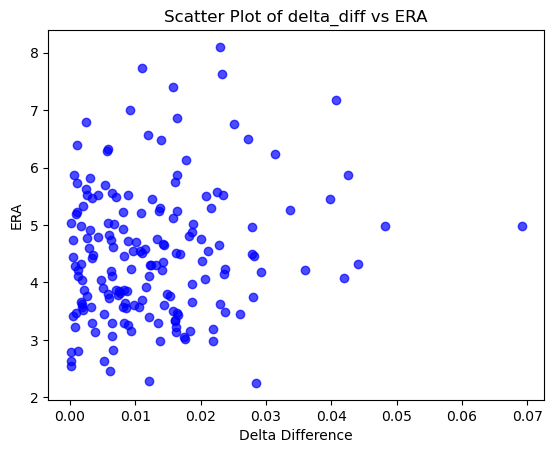

In [38]:
import matplotlib.pyplot as plt

# Assuming starter_data is your DataFrame
# Replace 'delta_diff' and 'ERA' with the actual column names in your DataFrame

x = starter_data['delta_diff']
y = starter_data['ERA']

plt.scatter(x, y, color='blue', alpha=0.7)  # You can customize the color and transparency

plt.title('Scatter Plot of delta_diff vs ERA')
plt.xlabel('Delta Difference')
plt.ylabel('ERA')

plt.show()


/var/folders/lk/v5prsxmx64v7gdbw42jg0k6h0000gn/T/ipykernel_42963/1758803491.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starter_data['Group_x'] = pd.qcut(starter_data['delta_diff'], q=[0, 0.25, 0.75, 1], labels=['Low Delta Diff', 'Mid Delta Diff', 'High Delta Diff'])
/var/folders/lk/v5prsxmx64v7gdbw42jg0k6h0000gn/T/ipykernel_42963/1758803491.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starter_data['Group_y'] = pd.qcut(starter_data['ERA'], q=[0, 0.25, 0.75, 1], labels=['Low ERA', 'Mid ERA', 

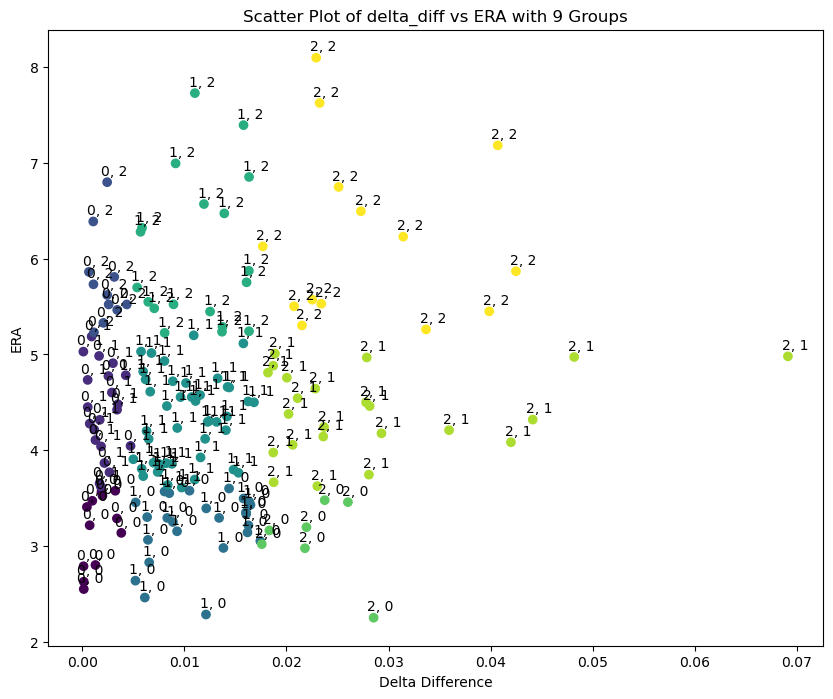

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming starter_data is your DataFrame
# Replace 'delta_diff', 'ERA' with the actual column names in your DataFrame

# Create a new column 'Group' to categorize the data into 3 groups for both x and y axis
starter_data['Group_x'] = pd.qcut(starter_data['delta_diff'], q=[0, 0.25, 0.75, 1], labels=['Low Delta Diff', 'Mid Delta Diff', 'High Delta Diff'])
starter_data['Group_y'] = pd.qcut(starter_data['ERA'], q=[0, 0.25, 0.75, 1], labels=['Low ERA', 'Mid ERA', 'High ERA'])

# Convert categorical labels to integers for color assignment
starter_data['Group_x'] = starter_data['Group_x'].cat.codes
starter_data['Group_y'] = starter_data['Group_y'].cat.codes

# Create a scatter plot with different colors for each group
plt.figure(figsize=(10, 8))
scatter = plt.scatter(starter_data['delta_diff'], starter_data['ERA'], c=starter_data['Group_x']*3 + starter_data['Group_y'], cmap='viridis')

# Annotate points with group labels
for i, row in starter_data.iterrows():
    plt.annotate(f"{row['Group_x']}, {row['Group_y']}", (row['delta_diff'], row['ERA']), textcoords="offset points", xytext=(5,5), ha='center')

# Set labels and title
plt.title('Scatter Plot of delta_diff vs ERA with 9 Groups')
plt.xlabel('Delta Difference')
plt.ylabel('ERA')

plt.show()


In [49]:
rightOutlier = starter_data[(starter_data['ERA'] < 5) & (starter_data['delta_diff'] > 0.325)]
rightOutlier

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,delta_diff,delta_avg,cluster,Group_x,Group_y
741,19388,664062,Tony Gonsolin,Tony Gonsolin,R,2023,29,LAD,SP,20,...,NaN,NaN,96.695793,96.927103,97.854808,0.069117,0.031552,1,2,1
